# 2D Ising model

Metropolis Algorithm

$$
P_{\mu\to\nu}=\begin{cases}
e^{-\beta \Delta E}\text{ if }\Delta E>0\\
1\text{ if }\Delta E<0
\end{cases}
$$

Single Spin Flip:

In [4]:
import numpy.random as random
import math
import matplotlib.pyplot as plt

def neighbor(i,j):
    l = len(lattice)
    return (lattice[i][(j-1) % l], lattice[i][(j + 1) % l], lattice[(i - 1) % l][j], lattice[(i + 1) % l][j])

def flip(i,j,beta):
    E0=-lattice[i][j]*sum(neighbor(i,j))
    if E0>0:  # ΔE<0
        lattice[i][j]=-lattice[i][j]
    else:
        p=math.exp(-beta*(-2*E0))
        r=random.random()
        if r<p:
            lattice[i][j]=-lattice[i][j]

lsize=20
maxcount=300
T0=1  # =J0/k
Tcount=200
T=[5/Tcount*k for k in range(1,Tcount+1)]
M=[]
E=[]
for Ti in T:
    lattice=[[random.choice([1,-1]) for _ in range(lsize)] for _ in range(lsize)]
    for _ in range(maxcount):
        for i in range(lsize):
            for j in range(lsize):
                flip(i,j,T0/Ti)
    Mi=(1/(lsize**2))*sum([sum(x) for x in lattice])
    Ei=1/((lsize**2))*sum([-lattice[i][j]*sum(neighbor(i,j)) for i in range(lsize) for j in range(lsize)])
    M.append(abs(Mi))
    E.append(Ei)

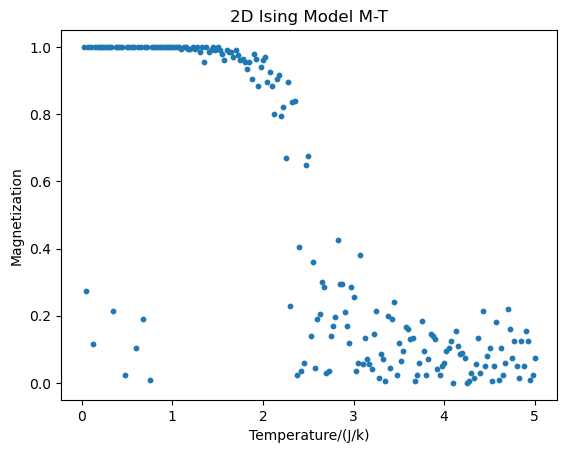

In [5]:
plt.scatter(T, M, s=10)
plt.title("2D Ising Model M-T")
plt.xlabel("Temperature/(J/k)")
plt.ylabel("Magnetization")
plt.savefig("2DIsing M-T.png",dpi=1000)
plt.savefig("2DIsing M-T.svg")

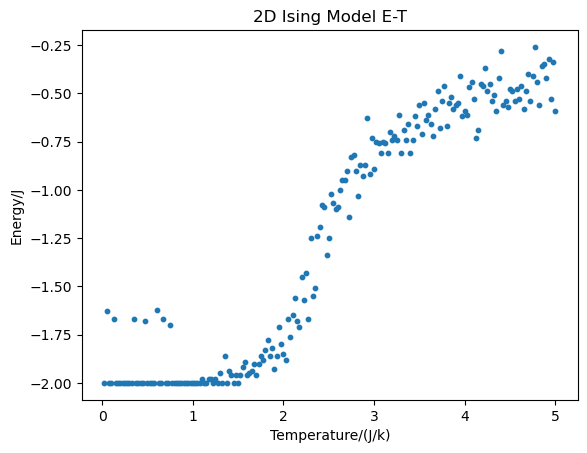

In [6]:
plt.scatter(T, list(map(lambda x:x/2,E)), s=10)
plt.title("2D Ising Model E-T")
plt.xlabel("Temperature/(J/k)")
plt.ylabel("Energy/J")
plt.savefig("2DIsing E-T.png",dpi=1000)
plt.savefig("2DIsing E-T.svg")

由于能量偶然涨落，热容误差更大。我不知道如何处理。

Wolff Algorithm: Cluster Flip

参考：<https://zhuanlan.zhihu.com/p/43757926>

<image src=https://pic3.zhimg.com/v2-182ef8bf3f598547d88062b446ca716e_r.jpg width=500>

<image src=https://pic4.zhimg.com/v2-aafd9a1e11b85398d9f98a1786f52fd3_r.jpg width=500>

$$
\frac{g_{\mu \to \nu}}{g_{\nu \to \mu}}=(1-P_{add})^{m-n}
$$

<image src=https://pic2.zhimg.com/v2-2486f2dbddb0db69f043df59ce55ddad_r.jpg width=800>

$$
(1-P_{add})^{m-n}\frac{A_{\mu\rightarrow\nu}}{A_{\nu\rightarrow\mu}}=e^{-\beta(E_\nu-E_\mu)}=e^{-2\beta J(m-n)}
$$

选择$P_{add}=1-e^{-2\beta J}$即可，有$A_{\mu\to\nu}=1$

In [ ]:
import random
import math
import matplotlib.pyplot as plt
seed=random.seed()

def neighbor(i,j):
    l = len(lattice)
    return (lattice[i][(j-1)%l],lattice[i][(j+1)%l],lattice[(i-1)%l][j],lattice[(i+1)%l][j])

def neighborcoord(i,j):
    l = len(lattice)
    return [(i,(j-1)%l),(i,(j+1)%l),((i-1)%l,j),((i+1)%l,j)]

def addneighbor(i,j,beta):
    c=[]
    for x,y in neighborcoord(i,j):
        if lattice[x][y]==lattice[i][j]:
            r=random.random()
            if r< 1-math.exp(-2*beta):
                c.append((x,y))
    return c 

def cluster(i,j,beta):
    s=[(i,j)] # seeds
    o=[] # operated
    while True:
        ts=[]
        for x,y in s:
            n=addneighbor(x,y,beta)
            ts.extend(list(set(n).difference(o)))
        o.extend(s)
        if ts==[]:
            break
        s=ts.copy()
    return o    

def clusterflip(c):
    for x,y in c:
        lattice[x][y]=-lattice[x][y]

lsize = 20
maxcount = 300
T0 = 1  # =J0/k
Tcount = 200
T = [5/Tcount*k for k in range(1,Tcount+1)]
M = []
E = []
for Ti in T:
    lattice = [[random.choice([1,-1]) for _ in range(lsize)] for _ in range(lsize)]
    for _ in range(maxcount):
        i=random.randint(0,lsize-1)
        j=random.randint(0,lsize-1)
        clusterflip(cluster(i,j,T0/Ti))
    Mi = (1/(lsize**2))*sum([sum(x) for x in lattice])
    # Ei = 1/((lsize**2))*sum([-lattice[i][j]*sum(neighbor(i,j)) for i in range(lsize) for j in range(lsize)])
    M.append(abs(Mi))
    # E.append(Ei)